In [115]:
import pandas as pd
import numpy as np
import scipy as sp

In [116]:
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7, 8.27 # figure size in inches

In [117]:
path = 'https://stepik.org/media/attachments/lesson/384464/london.csv'

In [118]:
df = pd.read_csv(path)

In [119]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [120]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [121]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [122]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [123]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

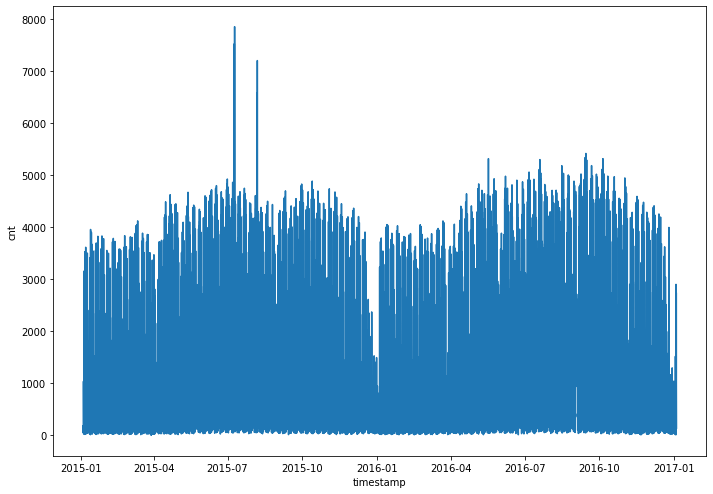

In [124]:
sns.lineplot(x=df.timestamp, y=df.cnt)

In [125]:
df2 = df.loc[:,['timestamp','cnt']].set_index('timestamp')

In [126]:
df3 = df2.resample(rule='D').sum().reset_index(); df3.head()

,timestamp,cnt
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601


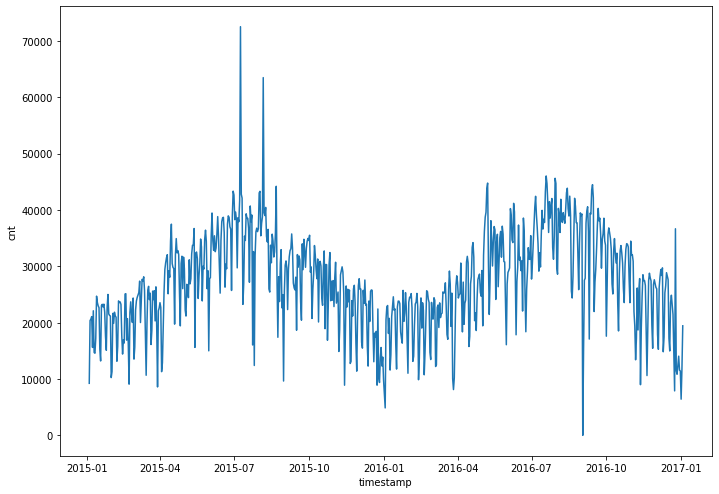

In [127]:
sns.lineplot(x=df3.timestamp, y=df3.cnt)

In [128]:
df3['cnt_ma'] = df3.cnt.rolling(window=3).mean()

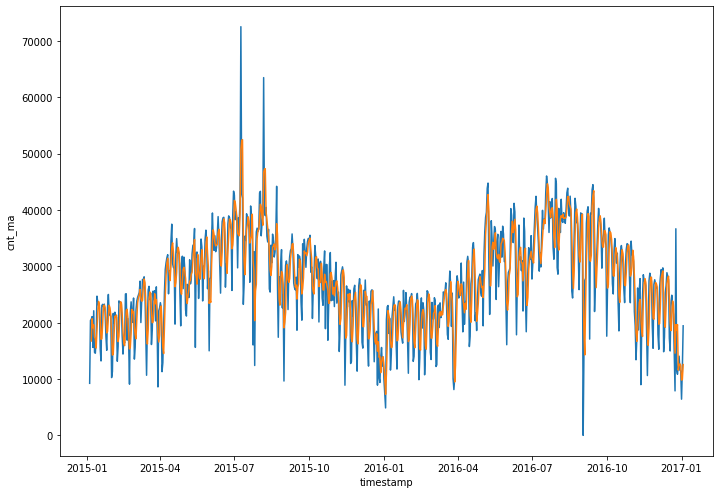

In [129]:
sns.lineplot(x=df3.timestamp, y=df3.cnt)
sns.lineplot(x=df3.timestamp, y=df3.cnt_ma)

In [130]:
df3.loc[df3.timestamp == '2015-07-09']

,timestamp,cnt,cnt_ma
186,2015-07-09,72504,50705.0


In [131]:
df3['dif'] = df3.cnt - df3.cnt_ma

In [132]:
st_dev = np.std(df3.dif); st_dev

4558.58664111794

In [133]:
df3['upper_bound'] = df3.cnt_ma + 2.576 * st_dev

In [134]:
df3['lower_bound'] = df3.cnt_ma - 2.576 * st_dev

In [138]:
df3.tail()

,timestamp,cnt,cnt_ma,dif,upper_bound,lower_bound
726,2016-12-30,11566,12682.000000,-1116.000000,24424.919188,939.080812
727,2016-12-31,11424,12347.333333,-923.333333,24090.252521,604.414146
728,2017-01-01,6421,9803.666667,-3382.666667,21546.585854,-1939.252521
729,2017-01-02,11823,9889.333333,1933.666667,21632.252521,-1853.585854
730,2017-01-03,19436,12560.000000,6876.000000,24302.919188,817.080812


In [139]:
df3['outliers_upper'] = df3.cnt > df3.upper_bound

In [147]:
df3[df3.outliers_upper == True]

,timestamp,cnt,cnt_ma,dif,upper_bound,lower_bound,outliers_upper
186,2015-07-09,72504,50705.000000,21799.000000,62447.919188,38962.080812,True
214,2015-08-06,63468,46627.333333,16840.666667,58370.252521,34884.414146,True
609,2016-09-04,27512,14259.000000,13253.000000,26001.919188,2516.080812,True
721,2016-12-25,36653,19650.666667,17002.333333,31393.585854,7907.747479,True


In [148]:
df3['outliers_lower'] = df3.cnt < df3.lower_bound

In [149]:
df3[df3.outliers_lower == True]

,timestamp,cnt,cnt_ma,dif,upper_bound,lower_bound,outliers_upper,outliers_lower
130,2015-05-14,15609,28709.333333,-13100.333333,40452.252521,16966.414146,False,True
189,2015-07-12,23240,36036.666667,-12796.666667,47779.585854,24293.747479,False,True
201,2015-07-24,16034,31013.666667,-14979.666667,42756.585854,19270.747479,False,True
232,2015-08-24,17400,29529.333333,-12129.333333,41272.252521,17786.414146,False,True
314,2015-11-14,8898,21037.333333,-12139.333333,32780.252521,9294.414146,False,True
607,2016-09-02,0,26086.333333,-26086.333333,37829.252521,14343.414146,False,True
615,2016-09-10,17080,31262.000000,-14182.000000,43004.919188,19519.080812,False,True
621,2016-09-16,21967,36193.333333,-14226.333333,47936.252521,24450.414146,False,True
678,2016-11-12,8990,20878.000000,-11888.000000,32620.919188,9135.080812,False,True
